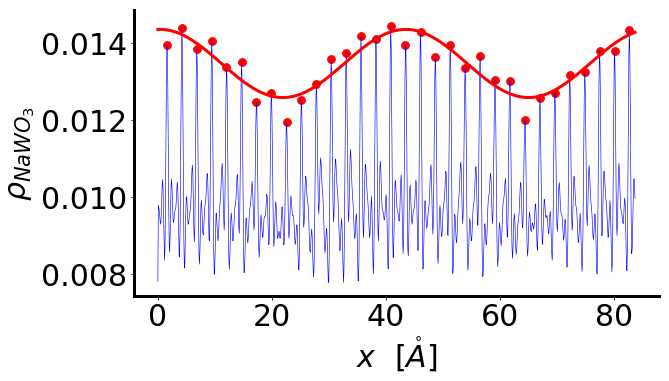

In [25]:
import matplotlib.pyplot as plt
import numpy
import scipy.optimize


cut_high = 0.0115

charge_diff = numpy.loadtxt('vplanar.txt')
charge_diff = charge_diff[:,1]

cell_length = 83.737472
cell_volume = cell_length * 10.468720 * 7.649663

#planar bulk rho of supercell of 128 NaWO3 unit cells
#bulk_rho = 128 / (10.468720 * 7.649663)

#charge_diff /= (10.468720 * 7.649663)
charge_diff /= 128

x = numpy.linspace(0,  cell_length, len(charge_diff))

#find envelope points
env_high = numpy.empty(0)
x_env_high = numpy.empty(0)
riem = numpy.empty(0)

for i, chg in enumerate(charge_diff):
    previ = i-1
    nexti = i+1
    if i == 0:
        previ = len(charge_diff)-1
    elif i == len(charge_diff)-1:
        nexti = 0
    if chg > charge_diff[previ] and chg > charge_diff[nexti] and chg >= cut_high:
        env_high = numpy.append(env_high, chg)
        x_env_high = numpy.append(x_env_high, x[i])
        
def env_sine(x, a, b, c, d):
    return a + b*numpy.sin(c*x + d)

#fit envelope points t sine curve
init = [125, 30, 0.1,  0]
popt, pcov = scipy.optimize.curve_fit(env_sine, x_env_high, env_high, p0=init)


#plot
plt.figure(1, figsize=[10,6])
plt.rcParams.update({'font.size': 30})

plt.plot(x, charge_diff, color='blue', linewidth=0.6)
plt.scatter(x_env_high, env_high, color='red', marker='o', s=60)
plt.plot(x, env_sine(x, *popt), color='red', linewidth=3)

plt.xlabel("$x \ \ [\mathring{A}]$", fontsize=30)
plt.ylabel(r"$\rho_{NaWO_3}$", fontsize=30)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)


plt.tight_layout()
plt.savefig("DW_BB_charge.eps")

